In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [3]:
cuacaT=cuaca.transpose()
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
1727691482,25.66,84.18,1009.82,28.59,1.727691e+09,4.06
1727691542,25.64,84.11,1009.87,28.59,1.727692e+09,4.06
1727691602,25.67,84.32,1009.99,28.58,1.727692e+09,4.05
1727691662,25.68,84.30,1010.05,28.59,1.727692e+09,4.06
1727691722,25.67,84.41,1010.03,28.56,1.727692e+09,4.05
1727691783,25.69,84.50,1010.09,28.56,1.727692e+09,4.06
1727691843,25.68,84.50,1010.09,28.55,1.727692e+09,4.06
1727691902,25.72,84.60,1010.10,28.57,1.727692e+09,4.08
1727691963,25.72,84.67,1010.05,28.56,1.727692e+09,4.06
1727692022,25.71,84.75,1010.07,28.53,1.727692e+09,4.09


In [9]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,410435.000000,410436.000000,410436.000000,410436.000000,4.104360e+05,410436.000000
mean,25.001166,85.681674,1011.431199,27.809776,1.715064e+09,4.091229
std,1.514482,11.168379,2.807733,3.285180,7.801046e+06,0.030868
min,17.670000,0.000000,0.000000,0.020000,0.000000e+00,0.000000
25%,24.130000,76.900000,1010.190000,25.390000,1.708645e+09,4.070000
50%,25.070000,90.110000,1011.480000,26.910000,1.715166e+09,4.090000
75%,26.050000,94.760000,1012.770000,30.290000,1.721400e+09,4.120000
max,29.700000,99.580000,1016.530000,41.120000,1.727693e+09,4.170000


In [14]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)

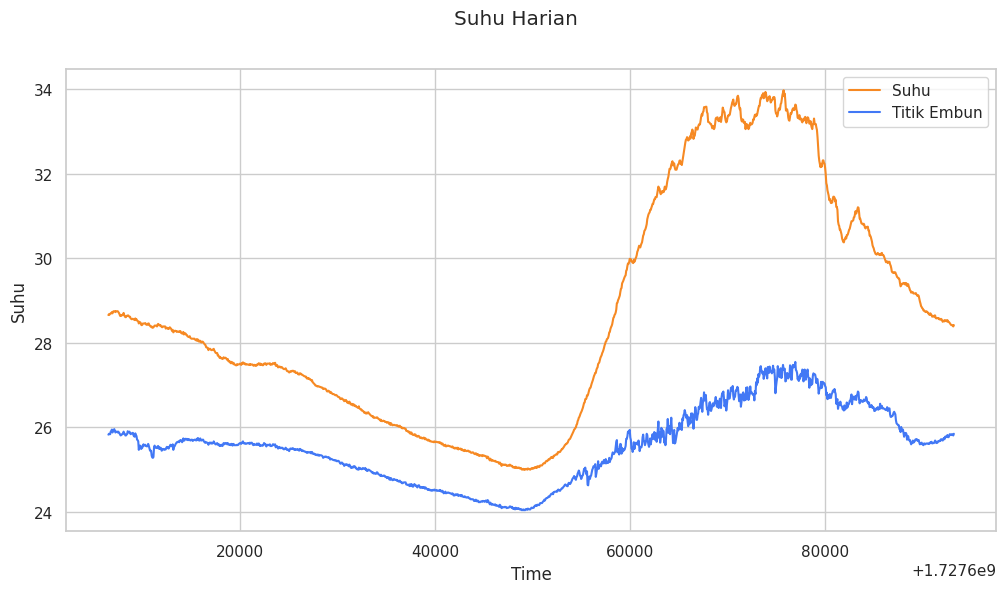

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
jam = 24
def plot_data(data, variable, color, label, last_n_points):
    """
    Plots a line chart for a specific variable.
    Parameters:
    - data (dict): A dictionary containing the data.
    - variable (str): The variable to plot.
    - color (str): The color of the line.
    - label (str): The label for the line in the legend.
    - last_n_points (int): The number of last points to plot.
    """
    plt.plot(data[variable].tail(last_n_points), color=color, label=label)

# Contoh penggunaan fungsi
plot_data(cuacaT, 'temperature', '#f68923', 'Suhu',60*jam)
plot_data(cuacaT, 'dew', '#4278f5', 'Titik Embun',60*jam)

# Menambahkan judul dan label sumbu
plt.suptitle("Suhu Harian")
plt.xlabel('Time')
plt.ylabel('Suhu')

# Menambahkan legenda
plt.legend()

# Menyimpan gambar ke file 'grafik_Suhu.png'
plt.savefig('grafik_Suhu.png')

# Menampilkan plot
plt.show()

In [16]:
import plotly.graph_objects as go

temperature = cuacaT['temperature'].tail(60*jam)
humidity = cuacaT['humidity'].tail(60*jam)
pressure = cuacaT['pressure'].tail(60*jam)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temperature,
    y=humidity,
    z=pressure,
    mode='markers',
    marker=dict(
        size=5,
        color=temperature,              # Color by temperature
        colorscale='Viridis',           # Colormap
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Humidity (%)',
        zaxis_title='Pressure (hPa)'
    ),
    title='3D Scatter Plot of Temperature, Humidity, and Pressure'
)

# Show the plot
fig.show()


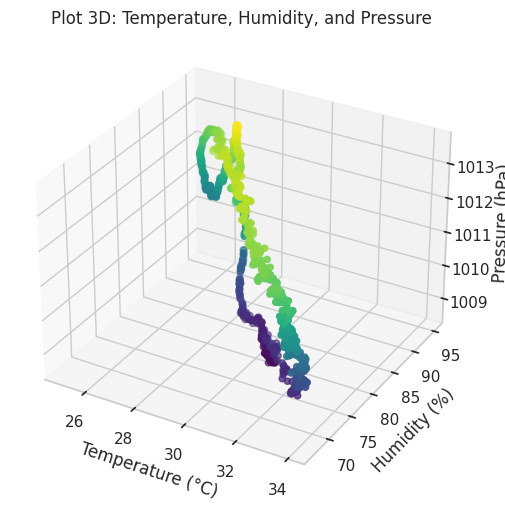

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = temperature = cuacaT['temperature'].tail(60*jam)
y = humidity = cuacaT['humidity'].tail(60*jam)
z = pressure = cuacaT['pressure'].tail(60*jam)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Pressure (hPa)')

# Add a title
ax.set_title('Plot 3D: Temperature, Humidity, and Pressure')

# Show the plot
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>